In [1]:
import pandas as pd
import matplotlib as ml
import numpy as np
import math as mt
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',50)

In [2]:
data=pd.read_csv("C:/Users/Roger/OneDrive/ESPECIAL/IA006/python/daily-minimum-temperatures.csv")
# data.head(20)
#data.tail(20)
# data.isna()
#data.dtypes
data=data.sort_values('Date')
data['Date'] = pd.to_datetime(data['Date'])
data['Year']=data['Date'].dt.year
data=data[['Year','Date','Temp']]

In [1]:

#normalizando a temperatura para ficar dentro do range [-2,2]
tmin=data.Temp.min()
tmax=data.Temp.max()
data_windowed=data.copy()
data_windowed['TempNorm']=(data['Temp']-tmin)/(tmax-tmin)*4-2
#gerando os 5 atrasos
for k in range(1,6) :
     colum_name='T-'+str(k)
     data_windowed[colum_name]=data_windowed['TempNorm'].shift(k)
data_windowed=data_windowed.iloc[5:].copy()
#criando os dados temporarios
x_temp=data_windowed.iloc[:,4:9]
y_temp=data_windowed.iloc[:,2:3]
date_temp=data_windowed.iloc[:,0:2]
#resetando o index para facilitar mais abaixo
x_temp.index = pd.RangeIndex(len(x_temp.index))
y_temp.index = pd.RangeIndex(len(y_temp.index))
date_temp.index = pd.RangeIndex(len(date_temp.index))
print(x_temp.describe())
print(y_temp.head())
print(date_temp.head())

NameError: name 'data' is not defined

In [4]:
#Criando o vetor w
w_temp=pd.DataFrame(columns=['w'])
w=pd.DataFrame(columns=['w1'])
variable_list=[]
np.random.seed(230482)
for t in range(0,100):
    #criando o vetor w     
    for l in range(0,5):
        w_temp.loc[l,'w']=np.random.uniform(0, 1)
    #Normalizando o vetor w para que sua soma seja 1
    w_temp['w']=w_temp['w']/w_temp['w'].sum()
    colum_name='w'+str(t+1)
    variable_name='xl_'+str(t+1)
    variable_list.append(variable_name)
    w[colum_name]=w_temp['w']
# vetor normalizado entre -2 e 2
x_a=pd.DataFrame(np.float_(np.dot(x_temp,w)),columns=variable_list)
print(x_a.describe())
x=pd.DataFrame(np.tanh(np.float_(np.dot(x_temp,w))),columns=variable_list)

              xl_1         xl_2         xl_3         xl_4         xl_5  \
count  3645.000000  3645.000000  3645.000000  3645.000000  3645.000000   
mean     -0.300995    -0.300777    -0.300899    -0.301017    -0.301013   
std       0.536565     0.556189     0.563089     0.536215     0.540863   
min      -1.735452    -1.852946    -1.847381    -1.718948    -1.765518   
25%      -0.710717    -0.716316    -0.721945    -0.718042    -0.716741   
50%      -0.320582    -0.323649    -0.318362    -0.326196    -0.320580   
75%       0.097050     0.103621     0.106291     0.092373     0.099029   
max       1.421583     1.512725     1.602333     1.515062     1.393115   

              xl_6         xl_7         xl_8         xl_9        xl_10  \
count  3645.000000  3645.000000  3645.000000  3645.000000  3645.000000   
mean     -0.301053    -0.301078    -0.301050    -0.301027    -0.300777   
std       0.543877     0.545376     0.545919     0.547797     0.553998   
min      -1.789909    -1.742241    -1

In [5]:
modified_data=date_temp.copy()
modified_data['Temp']=y_temp['Temp']
modified_data['C']=1
for h in list(x):
     modified_data[h]=x[h]
# print(modified_data.describe())
# print(modified_data.head(5))
# print(modified_data.describe())

Relatorio pelo erro médio, o menor erro foi obtido em:
T                 18.000000
Lambda             0.000000
Erro Treino        2.492984
Erro Validação     2.514065
Erro Teste         2.326774
Name: 17, dtype: float64


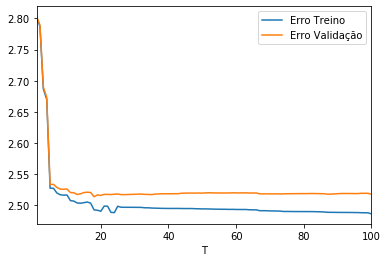

<function show at 0x0ABFCD20>


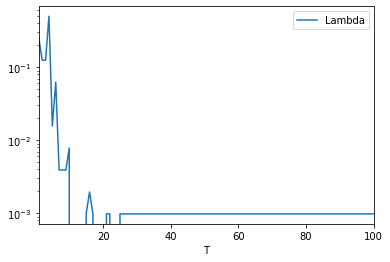

<function show at 0x0ABFCD20>


In [11]:
#configuraçõeos do método
ano_teste=1990
atrasos=100
lista_folders=[4]
# lista_lambda=[0,]
lista_lambda=[0,0.000976563,0.001953125,0.00390625,0.0078125,0.015625,0.03125,0.0625,0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024]
#gera os dados de treino e teste
data_train=modified_data[modified_data['Year']!=ano_teste].copy()
# print(data_train.head())
data_test=modified_data[modified_data['Year']==ano_teste].copy()
#inicia os testes
resultados=pd.DataFrame(columns=['T','Lambda','Folder','Dado Treino','Dado Validação','Matrix','Erro Treino','Erro Validação','Erro Teste'])
linha=0
for folders in lista_folders:
    #gerando uma coluna com o número de folds a partir de uma distribuição normal e inteiros
    np.random.seed(9001)
    data_train['fold'] = np.random.randint(1,folders+1,size=len(data_train))
    for la in lista_lambda:
        for f in range(1,folders+1):
            lenght=len(data_train[data_train['fold']==f])       
        y_test=data_test.iloc[:,2:3].copy()
        for k in range(1,atrasos+1):
            print("Regressão:Lambda {} K {}".format(la,k))
            #dados treino globais
            x_test=data_test.iloc[:,3:k+4].copy()
            
#             print(x_test.head(2))
            for f in range(1,folders+1):
#                 print(k)
                linha+=1
                resultados.loc[linha,'T']=k
                resultados.loc[linha,'Lambda']=la
                resultados.loc[linha,'Folder']=f
                #Dados treino
                x_train=data_train[data_train['fold']!=f]
                x_train=x_train.iloc[:,3:k+4].copy()
#                 print("aquigsgsdf")
#                 print(x_train.head(2))
                y_train=data_train[data_train['fold']!=f]
                y_train=y_train.iloc[:,2:3].copy()
#                 print(y_train.head(2))
                resultados.loc[linha,'Dado Treino']=len(x_train)
                #Dados validação
                x_valid=data_train[data_train['fold']==f]
                x_valid=x_valid.iloc[:,3:k+4].copy()
#                 print(x_valid.head(2))
                y_valid=data_train[data_train['fold']==f]
                y_valid=y_valid.iloc[:,2:3].copy()
#                 print(y_valid.head(2))
                resultados.loc[linha,'Dado Validação']=len(x_valid)
                #criação da matrix identidade
                i=np.identity(k+1)
                i[0,0]=0
                #calculo da inversa
#                 print(x_train)
                xtx=(x_train.transpose()).dot(x_train)
#                 print(xtx.head(20))
#                 print(i)
                rank=np.linalg.matrix_rank(xtx.values)
                if rank==(k+1):
                    message="Sim"
                else:
                    message="Não"
                resultados.loc[linha,'Matrix']=message
                #cálculo do vetor b para regressão
                xtxinv=pd.DataFrame(np.linalg.pinv(xtx.values+la*i), xtx.columns, xtx.index)
                b=(xtxinv.dot(x_train.transpose())).dot(y_train)
                #erro treino
                yh_train=x_train.dot(b)
                error_train=mt.sqrt(((yh_train-y_train)**2).mean())
                resultados.loc[linha,'Erro Treino']=error_train
                #erro validação
                yh_valid=x_valid.dot(b)
                error_valid=mt.sqrt(((yh_valid-y_valid)**2).mean())
                resultados.loc[linha,'Erro Validação']=error_valid
                #erro teste
#                 print(x_test.head())
#                 print(b.head())
                yh_test=x_test.dot(b)
                error_tf=mt.sqrt(((yh_test-y_test)**2).mean())
                resultados.loc[linha,'Erro Teste']=error_tf
    # leitura dos resultados
# print(resultados[['Atraso','Lambda','Folder','Erro Treino','Erro Validação','Erro Teste']])
relatorio_lista=[]
linha=0
for la in lista_lambda:
    for k in range(1,atrasos+1):
        print("Relatorio 1:Lambda {} K {}".format(la,k))
        linha +=1
        x=resultados[(resultados['T']==k)&(resultados['Lambda']==la)].copy()
        x=x.astype({'Erro Treino':float,'Erro Validação':float,'Erro Teste':float})
        x=x[['T','Lambda','Erro Treino','Erro Validação','Erro Teste']]
        relatorio_lista.append((x.mean()).values.tolist())
relatorio1=pd.DataFrame(relatorio_lista,columns=['T','Lambda','Erro Treino','Erro Validação','Erro Teste'])
# print(relatorio1)
relatorio_lista=[]
linha=0
for k in range(1,atrasos+1):
    print("Relatorio 2, K {}".format(k))
    linha +=1;
    x=relatorio1[relatorio1['T']==k].copy()
    x=x.astype({'Erro Treino':float,'Erro Validação':float,'Erro Teste':float})
    x=x[['T','Lambda','Erro Treino','Erro Validação','Erro Teste']]
    linha_dados=x.loc[x['Erro Validação'].idxmin()]
    relatorio_lista.append((linha_dados).values.tolist())
relatorio2=pd.DataFrame(relatorio_lista,columns=['T','Lambda','Erro Treino','Erro Validação','Erro Teste'])
# print(relatorio2)

print("Relatorio pelo erro médio, o menor erro foi obtido em:")
linha_dados=relatorio2.loc[relatorio2['Erro Validação'].idxmin()]
print(linha_dados)
relatorio2.plot(x='T',y=['Erro Treino','Erro Validação'])
ml.pyplot.show()
print(ml.pyplot.show)
relatorio2.plot(x='T',y=['Lambda'])
ml.pyplot.yscale('log')
ml.pyplot.show()
print(ml.pyplot.show)



Gerando estimativa pela média dos resutlados dos modelos.
18
0.0
O erro de teste utilizando a média de saída dos estimadores foi:2.3238246183907734
<function show at 0x01230150>


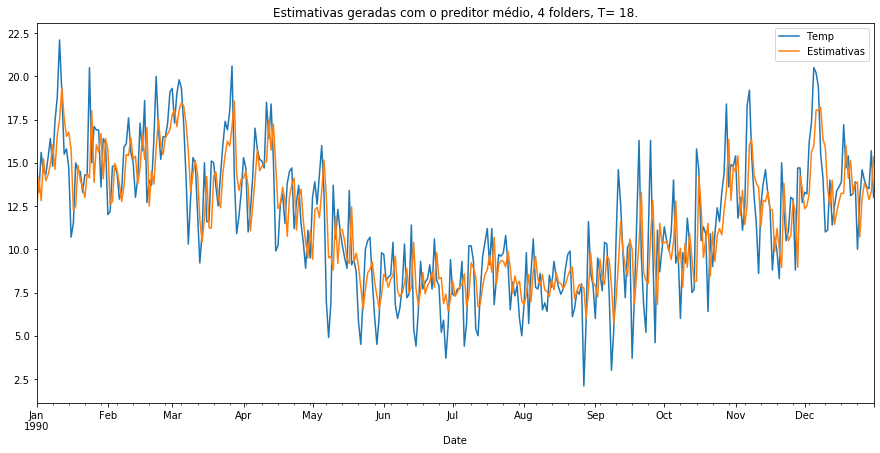

In [28]:
print("Gerando estimativa pela média dos resutlados dos modelos.")
#como o atraso é covnertido em float temos que voltar ele para int 
k=np.int(linha_dados['T'])
print(k)
la=np.float(linha_dados['Lambda'])
print(la)
x_test=data_test.iloc[:,3:k+4].copy()
#truque para inicializar o dataframe contendo zeros
y_test_medio=y_test.copy()
y_test_medio=y_test_medio-y_test
for f in range(1,folders+1):
    #Dados testefolder
    x_train=data_train[data_train['fold']!=f]
    x_train=x_train.iloc[:,3:k+4].copy()
    y_train=data_train[data_train['fold']!=f]
    y_train=y_train.iloc[:,2:3].copy()
    #Dados validação no folder
    x_valid=data_train[data_train['fold']==f]
    x_valid=x_valid.iloc[:,3:k+4].copy()
    y_valid=data_train[data_train['fold']==f]
    y_valid=y_valid.iloc[:,2:3].copy()
    #calculo da inversa
    xtx=(x_train.transpose()).dot(x_train)
    #criação da matrix identidade
    i=np.identity(k+1)
    i[0,0]=0
    #cálculo do vetor w para regressão
    xtxinv=pd.DataFrame(np.linalg.pinv(xtx.values-la*i), xtx.columns, xtx.index)
    w=(xtxinv.dot(x_train.transpose())).dot(y_train)
    #erro teste
    yh_test=x_test.dot(w)
    y_test_medio = y_test_medio+yh_test.values
y_test_medio=y_test_medio/folders
error_teste_medio=mt.sqrt(((y_test_medio-y_test)**2).mean())
print("O erro de teste utilizando a média de saída dos estimadores foi:{}".format(error_teste_medio))
#gráfico
grafico_medio=data_test.iloc[:,1:3].copy()
grafico_medio['Estimativas']=y_test_medio
grafico_medio.plot(x='Date',y=['Temp','Estimativas'],figsize=(15,7))
title="Estimativas geradas com o preditor médio, {} folders, T= {}.".format(folders,k)
ml.pyplot.title(title)
print(ml.pyplot.show)

Regressão:Lambda 0 K 18
  Atraso Lambda Folder Dado Treino Dado Validação Matrix Erro Treino  \
1     18      0      1        2475            805    Sim     2.48206   
2     18      0      2        2442            838    Sim     2.49775   
3     18      0      3        2466            814    Sim     2.49638   
4     18      0      4        2457            823    Sim     2.49575   

  Erro Validação Erro Teste  
1        2.54394    2.33081  
2         2.4996    2.32651  
3        2.50937    2.32661  
4        2.50335    2.32315  
<function show at 0x01230150>


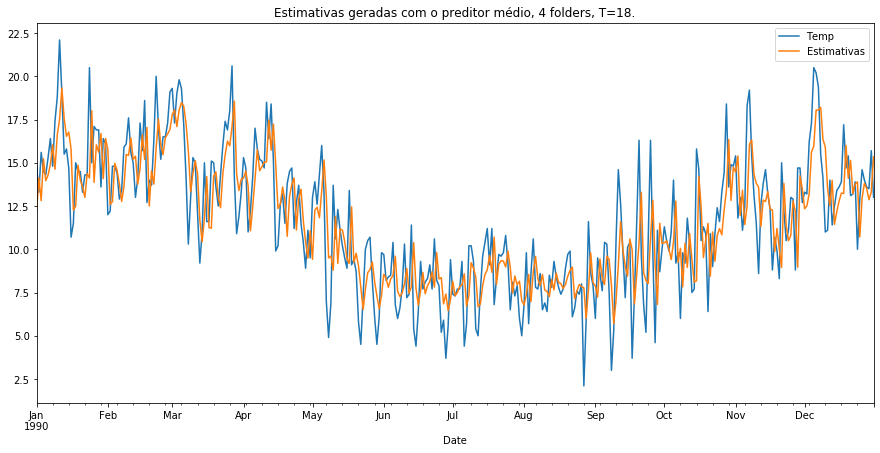

In [26]:
#configuraçõeos do método
ano_teste=1990
atrasos=18
lista_folders=[4]
lista_lambda=[0]
# lista_lambda=[0,0.000976563,0.001953125,0.00390625,0.0078125,0.015625,0.03125,0.0625,0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024]
#gera os dados de treino e teste
data_train=modified_data[modified_data['Year']!=ano_teste].copy()
# print(data_train.head())
data_test=modified_data[modified_data['Year']==ano_teste].copy()
#inicia os testes
resultados=pd.DataFrame(columns=['Atraso','Lambda','Folder','Dado Treino','Dado Validação','Matrix','Erro Treino','Erro Validação','Erro Teste'])
linha=0
y_test=data_test.iloc[:,2:3].copy()
y_test_final=y_test
y_test_final=y_test_final-y_test
for folders in lista_folders:
    #gerando uma coluna com o número de folds a partir de uma distribuição normal e inteiros
    np.random.seed(9001)
    data_train['fold'] = np.random.randint(1,folders+1,size=len(data_train))
    for la in lista_lambda:
        for f in range(1,folders+1):
            lenght=len(data_train[data_train['fold']==f])       
        for k in range(18,atrasos+1):
            print("Regressão:Lambda {} K {}".format(la,k))
            #dados treino globais
            x_test=data_test.iloc[:,3:k+4].copy()
            
#             print(x_test.head(2))
            for f in range(1,folders+1):
#                 print(k)
                linha+=1
                resultados.loc[linha,'Atraso']=k
                resultados.loc[linha,'Lambda']=la
                resultados.loc[linha,'Folder']=f
                #Dados treino
                x_train=data_train[data_train['fold']!=f]
                x_train=x_train.iloc[:,3:k+4].copy()
#                 print("aquigsgsdf")
#                 print(x_train.head(2))
                y_train=data_train[data_train['fold']!=f]
                y_train=y_train.iloc[:,2:3].copy()
#                 print(y_train.head(2))
                resultados.loc[linha,'Dado Treino']=len(x_train)
                #Dados validação
                x_valid=data_train[data_train['fold']==f]
                x_valid=x_valid.iloc[:,3:k+4].copy()
#                 print(x_valid.head(2))
                y_valid=data_train[data_train['fold']==f]
                y_valid=y_valid.iloc[:,2:3].copy()
#                 print(y_valid.head(2))
                resultados.loc[linha,'Dado Validação']=len(x_valid)
                #criação da matrix identidade
                i=np.identity(k+1)
                i[0,0]=0
                #calculo da inversa
#                 print(x_train)
                xtx=(x_train.transpose()).dot(x_train)
#                 print(xtx.head(20))
#                 print(i)
                rank=np.linalg.matrix_rank(xtx.values)
                if rank==(k+1):
                    message="Sim"
                else:
                    message="Não"
                resultados.loc[linha,'Matrix']=message
                #cálculo do vetor b para regressão
                xtxinv=pd.DataFrame(np.linalg.pinv(xtx.values-la*i), xtx.columns, xtx.index)
                b=(xtxinv.dot(x_train.transpose())).dot(y_train)
                #erro treino
                yh_train=x_train.dot(b)
                error_train=mt.sqrt(((yh_train-y_train)**2).mean())
                resultados.loc[linha,'Erro Treino']=error_train
                #erro validação
                yh_valid=x_valid.dot(b)
                error_valid=mt.sqrt(((yh_valid-y_valid)**2).mean())
                resultados.loc[linha,'Erro Validação']=error_valid
                #erro teste
                yh_test=x_test.dot(b)
                y_test_final=y_test_final+yh_test
                error_tf=mt.sqrt(((yh_test-y_test)**2).mean())
                resultados.loc[linha,'Erro Teste']=error_tf
print(resultados)
grafico_medio=data_test.iloc[:,1:3].copy()
grafico_medio['Estimativas']=y_test_final/4
grafico_medio.plot(x='Date',y=['Temp','Estimativas'],figsize=(15,7))
title="Estimativas geradas com o preditor médio, {} folders, T={}.".format(folders,k)
ml.pyplot.title(title)
print(ml.pyplot.show)